<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/HandsOnML-AI/blob/master/numpy_tuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

Some numpy terms [also torch, jax, mlx]:
Each dimension is called **axis**
number of axes is called **rank**
array's list of axes is called **shape**
total number of elements is called **size**



In [2]:
#N-d array

print(np.array([[1,2,3,4], [3,4,5,6]]))

[[1 2 3 4]
 [3 4 5 6]]


In [4]:
print(np.zeros((2,3,4), dtype=int))

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [5]:
type(np.zeros((2,3,4)))

numpy.ndarray

In [6]:
#init an array with a particular value
np.full((2,3,5), np.pi)

array([[[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
        [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
        [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]],

       [[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
        [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
        [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]]])

In [7]:
np.empty((2,3))

array([[4.99108813e-310, 0.00000000e+000, 4.99199993e-310],
       [2.44411742e+062, 6.92248532e-310, 6.92243016e-310]])

In [8]:
#python's range function
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

extra caution required when dealing with floating point values due to precision issues

In [10]:
np.arange(0.0,5/3, 1/3) # could go till 4/3 or 5/3 depending on rounding

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667])

to exactly have a certain number of elements in array, preferable to use np.linspace

In [12]:
np.linspace(0,5/3, 6)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667])

In [13]:
#Random numbers - uniform distribution
a = np.random.rand(1000)


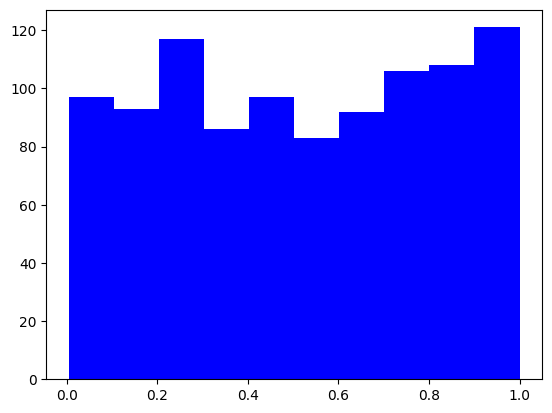

In [14]:
import matplotlib.pyplot as plt
plt.hist(a, color="blue", bins = 10)
plt.show()

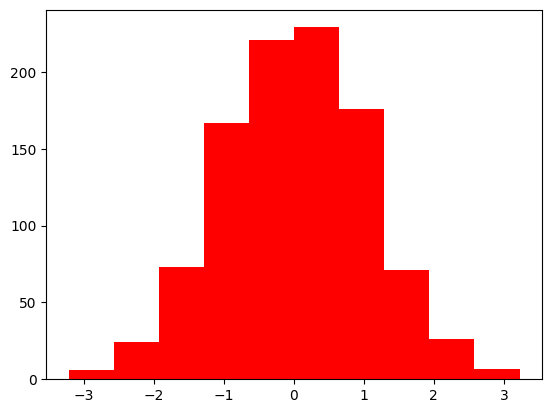

In [15]:
#Random numbers - normal distribution
b = np.random.randn(1000)
plt.hist(b, color="red", bins=10)
plt.show()

In [16]:
# initilaization of array from a function - efficient

def my_function(x,y):
  return y + 10 * x

np.fromfunction(my_function, (3,10))

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.]])

In [17]:
# dtype of ndarray
c = np.arange(1,5)
c.dtype # determined by numpy

dtype('int64')

In [18]:
#explicit type setting
d = np.arange(1,5 , dtype=np.int32)

In [19]:
d.dtype, d.shape

(dtype('int32'), (4,))

In [20]:
# itemsize - byte length of the ndarray
e = np.arange(1,5,dtype=np.complex64)
e.itemsize

8

In [21]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data # memory of the array stored as flattend buffer

In [22]:
hasattr(f.data, "tobytes")

True

In [24]:
f.data.tobytes()

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'

In [25]:
g = np.arange(1,5)
g.shape

(4,)

In [26]:
g.shape = (2,2) # reshape the array in place
g

array([[1, 2],
       [3, 4]])

In [27]:
h = g.reshape(4,) # create a new array and reshape the original array and copy to new array
h

array([1, 2, 3, 4])

In [28]:
h.ndim #rank of the array

1

In [29]:
g.ndim

2

In [30]:
g[0,0] = 2 # assigning values at a position
g

array([[2, 2],
       [3, 4]])

In [32]:
k = g.ravel()

In [33]:
g.data

In [34]:
k.data # ravel() basically returns the same array at g in 1d format

In [35]:
k

array([2, 2, 3, 4])

In [36]:
#Broadcasting - an important idea
#first rule - if arrays are not of same shape - > prepend 1 to smaller ranked array till the same shape is achieved
h = np.arange(5).reshape(1, 1, 5)
h

array([[[0, 1, 2, 3, 4]]])

In [37]:
k = np.array([10,20,30,40,50])
h + k # 1,1,5 + 5, -> 1,1,5 + 1,1,5 = 1,1,5


array([[[10, 21, 32, 43, 54]]])

In [38]:
#Second rule
k = np.arange(6).reshape(2,3)
k + [[100],[200]] # 2,3 + 2,1


array([[100, 101, 102],
       [203, 204, 205]])

In [40]:
#Combining rules 1 and 2
k + [100,200,300] # 3, becomes 1,3 and then that is broadcast to 2,3

array([[100, 201, 302],
       [103, 204, 305]])

In [41]:
k+1000

array([[1000, 1001, 1002],
       [1003, 1004, 1005]])

In [42]:
#upcasting - change dtype to make sure all possible values are accommodated
k1 = np.arange(0, 5, dtype=np.uint8)
k2= k1 + np.arange(3,8, dtype=np.int8)
k2.dtype

dtype('int16')

In [43]:
k3 = k1 + 1.5 # uint8 is upcast to float64

In [44]:
k3.dtype

dtype('float64')

In [45]:
m = np.array([20, -5, 30, 40])
m > 20

array([False, False,  True,  True])

In [46]:
#Mathematical functions on nd-arrays
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a.shape, a.dtype, a.ndim)

(2, 3) float64 2


In [47]:
print(a.mean())

6.766666666666667


In [48]:
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.084835843520964
var = 25.855555555555554


In [52]:
#mean, sum, max,min can also be called along different axes
matrix = np.arange(24).reshape(2,3,4)

In [53]:
matrix.shape

(2, 3, 4)

In [54]:
matrix.sum() # sum of all elements - default behaviour

276

In [55]:
matrix.sum(axis=0) # sum of elements along axis 0 -> 2,3,4 becomes 3,4

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [56]:
matrix.sum(axis=0).shape

(3, 4)

In [57]:
matrix.sum(axis=1).shape # 2,3,4 becomes 2,4

(2, 4)

In [58]:
matrix.sum(axis=2) # 2,3,4 becomes 2,3

array([[ 6, 22, 38],
       [54, 70, 86]])

In [61]:
matrix.sum(axis=(0,2))


array([ 60,  92, 124])

In [63]:
#universal functions - ufunc
#these are fast vectorized functions which take an array, perform mathematical operations on the numpy array and give the new array in an efficient way using the optimized BLAS C code underneath
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.sqrt(a)


<ipython-input-63-1a46b4946851>:4: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(a)


array([[       nan, 1.76068169, 2.64575131],
       [3.16227766, 3.31662479, 3.46410162]])

In [64]:
#Binary universal functions - binary ufunc
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a,b)


array([ 3,  6,  2, 11])

In [65]:
np.subtract(a,b)

array([ -1, -10,   4,  -3])

In [66]:
np.maximum(a,b
           )

array([2, 8, 3, 7])

In [67]:
np.minimum(a,b)

array([ 1, -2, -1,  4])

In [68]:
np.multiply(a,b) # elementwise multiplication

array([  2, -16,  -3,  28])

In [69]:
np.copysign(a,b)

array([ 1.,  2., -3.,  4.])

In [70]:
# array indexing - ways to index arrays and pick elements of choice
a = np.array([4,5,6,10,90,89,24])
a[:]

array([ 4,  5,  6, 10, 90, 89, 24])

In [71]:
a[2]

6

In [72]:
a[:2]

array([4, 5])

In [73]:
a[2:]

array([ 6, 10, 90, 89, 24])

In [74]:
a[4:7]

array([90, 89, 24])

In [75]:
a[:-1]

array([ 4,  5,  6, 10, 90, 89])

In [76]:
a[2::2] #starting from 2 go till end of array with step size 2

array([ 6, 90, 24])

In [79]:
a[-1::-2] #start from end go till start with step size -2, i.e 2 in reverse direction

array([24, 90,  6,  4])

In [80]:
#fancy indexing
b = np.arange(48).reshape(4, 12)
b[(0,2), 2:4] # choose 0 and 2 row and columns from 2 to 4[4 excluded]

array([[ 2,  3],
       [26, 27]])

In [81]:
b[:, (-1,2,-1)]

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

In [82]:
b[(1,2,1), (5,9,8)]

array([17, 33, 20])

In [83]:
#Ellipsis
c = b.reshape(4,2,6)

In [84]:
c[2,...] #ellipsis 2nd matrix with all rows and columns

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [85]:
c[2,1,...]

array([30, 31, 32, 33, 34, 35])

In [86]:
c[...,3] # third column in all matrices and rows

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

In [88]:
#boolean indexing
b = np.arange(48).reshape(4, 12)
rows_on = np.array([True, False, True, False])
b[rows_on,:]


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [89]:
cols_on = np.array([False, True, False] * 4)
b[:,cols_on]

array([[ 1,  4,  7, 10],
       [13, 16, 19, 22],
       [25, 28, 31, 34],
       [37, 40, 43, 46]])

In [90]:
#the above method works on individual axes -> we can project this operation on multiple axes using np.ix_

b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [91]:
b [b%3 == 1]

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])

In [92]:
c.shape[0]

4

In [95]:
len(c)# same as c.shape[0]

4

In [97]:
q1 = np.full((3,4), 1.0)
q2 = np.full((4,4),2.0)
q3 = np.full((4,4),3.0)
np.vstack((q1,q2,q3)).shape #vertical stacking all the arrays

(11, 4)

In [98]:
np.hstack((q2,q3)) #horizontal stacking 2 and 3 -> prerequisite -> number of rows are same

array([[2., 2., 2., 2., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3.],
       [2., 2., 2., 2., 3., 3., 3., 3.]])

In [99]:
np.hstack((q1,q3)) # since rows are not the same number, error is raised

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 4

In [100]:
#concatenate
np.concatenate((q1,q2,q3), axis=0) # stacking arrays along given axis


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [101]:
#stack - stacks the arrays of same shape along a new axis
np.stack((q2,q3))

array([[[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]])

In [102]:
np.stack((q2,q3)).shape

(2, 4, 4)

In [103]:
#split - opposite of stack
r = np.arange(24).reshape(6,4)
r1,r2,r3 = np.vsplit(r,3)

In [104]:
r1.shape,r2.shape,r3.shape

((2, 4), (2, 4), (2, 4))

In [105]:
c1,c2 = np.hsplit(r,2)

In [106]:
c1.shape,c2.shape

((6, 2), (6, 2))

In [107]:
#Transposing arrays
t = np.arange(24).reshape(4,2,3)

t1 = t.transpose(1,0,2)
t1.shape

(2, 4, 3)

In [108]:
t2 = t.swapaxes(1,0) # swap axes 0 and 1

In [109]:
t2.shape

(2, 4, 3)

In [110]:
#Linear algebra - numpy arrays and linear algebra - mostly dealing with 2D matrices
m1 = np.arange(10).reshape(2,5)
m1.shape, m1.dtype

((2, 5), dtype('int64'))

In [111]:
m1.T # alternateive to m1.transpose(1,0) .T is matrix transpose

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [112]:
m1.T.shape

(5, 2)

In [113]:
#Matrix multiplication
n1 = np.arange(10).reshape(2,5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [116]:
n2 = np.arange(15).reshape(5,3)
n2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [117]:
n3 = np.dot(n1,n2) # n1*n2 is elementwise mutliplication - hadamard product

In [118]:
n3.shape

(2, 3)

In [119]:
#matrix inverse and pseudo inverse
import numpy.linalg as linalg # linear algebra library part of numpy
m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3.shape



(3, 3)

In [120]:
#m3 is a square matrix -> hence inverse is calculable
m3_inv = linalg.inv(m3)

In [121]:
m3_inv

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

In [122]:
#pinv - pseudo inv is also available which is usually helpful for matrices where inverse is not exaclty deteminate
m3_pinv = linalg.pinv(m3)

In [123]:
np.mean(np.square(np.subtract(m3_inv, m3_pinv)))

5.262251020862191e-29

In [124]:
#matrix multiplied with its inverse gives identity matrix
np.dot(m3,m3_inv) #there could be some floating point errors


array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00],
       [ 6.31439345e-16,  1.00000000e+00, -1.38777878e-16],
       [ 5.21110932e-15, -2.38697950e-15,  1.00000000e+00]])

In [125]:
np.eye(3) # to generate identity matrix of size 3,3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [126]:
#QR decomposition - decomposition into q- orthonormal matrix and R - upper triangular matrix
q,r = np.linalg.qr(m3)

In [127]:
r

array([[-21.61018278, -29.89331494, -32.80860727],
       [  0.        ,   0.62427688,   1.9894538 ],
       [  0.        ,   0.        ,  -3.26149699]])

In [128]:
q

array([[-0.04627448,  0.98786672,  0.14824986],
       [-0.23137241,  0.13377362, -0.96362411],
       [-0.97176411, -0.07889213,  0.22237479]])

In [129]:
np.dot(q,r)

array([[ 1.,  2.,  3.],
       [ 5.,  7., 11.],
       [21., 29., 31.]])

In [130]:
#determinant
np.linalg.det(m3)

43.99999999999997

In [131]:
#Eigen vectors and eigen values - important ideas in linear algebra and matrix least square solutions
eig_val, eig_vec = np.linalg.eig(m3) #since m3 is 3X3 we will have 3 eig values and 3 eig vectors

In [132]:
eig_val

array([42.26600592, -0.35798416, -2.90802176])

In [134]:
eig_vec

array([[-0.08381182, -0.76283526, -0.18913107],
       [-0.3075286 ,  0.64133975, -0.6853186 ],
       [-0.94784057, -0.08225377,  0.70325518]])

In [139]:
a = eig_vec * eig_val

In [140]:
b = np.dot(m3, eig_vec)

In [141]:
a-b # almost zero taking away rounding errors

array([[-6.21724894e-15, -1.66533454e-15,  3.10862447e-15],
       [-3.55271368e-15, -5.30131494e-15,  5.32907052e-15],
       [-3.55271368e-14, -5.38458167e-15,  9.76996262e-15]])

In [142]:
#Singular value decomposition
m4 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
print(m4.shape)

(4, 5)


In [143]:
U, S_diag, V = np.linalg.svd(m4)

In [144]:
U

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.]])

In [145]:
S_diag

array([3.        , 2.23606798, 2.        , 0.        ])

In [146]:
V

array([[-0.        ,  0.        ,  1.        , -0.        ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.        ,  0.        ,  0.89442719],
       [ 0.        , -1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [148]:
S = np.zeros((4,5))

In [149]:
S[(0,1,2,3), (0,1,2,3)] = S_diag


In [150]:
S

array([[3.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.23606798, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [151]:
#easier and better way to do
S2 = np.zeros((4,5))
S2[np.diag_indices(4)] = S_diag
S2.shape

(4, 5)

In [152]:
(S2 == S).all()

True

In [153]:
(U.dot(S).dot(V) - m4).sum()

-3.3306690738754696e-16

In [154]:
np.diag(m4) # returns diagonal elements

array([1, 0, 0, 0])

In [156]:
np.trace(m4) # sum of diagonal elements

1

In [ ]:
#solving a system of linear equations


to solve a system of linear equations like \


*   $2x + 3y = 9$
*   $3x - 11y = 13$



In [158]:
coeffs = np.array([[2,3], [3,-11]])
constants = np.array([9,13])
solution = np.linalg.solve(coeffs,constants)

In [159]:
solution

array([4.4516129 , 0.03225806])

In [160]:
#to verify the solution
np.allclose(np.dot(coeffs, solution), constants)


True

In [161]:
#Vectorization - very important - helps optimize operations involving loops to leverage the speed of numpy instead of python for loops
#Example to demonstrate the same
# the following for loops are in native python - a very bad idea - these are very inefficient
data = np.empty((768, 1024))
import time
start = time.time()

for y in range(768):
  for x in range(1024):
    data[y,x] = np.sin(x*y/45)
time1 = time.time() - start



In [162]:
start = time.time()
x = np.arange(0,1024)
y = np.arange(0,768)
X,Y = np.meshgrid(x,y)
data2= np.sin(X*Y/45)
time2 = time.time() - start


In [165]:
np.allclose(data, data2)

True

the data and data2 computed in two different approaches - pure python for loops and numpy's meshgrid which generates X of shape 768, 1024 having x values in rows replicated and y values in columns replicated. this is all done in numpy itself.
To have an idea of how efficient it is , we ll compare the runtimes of both approaches


In [166]:
print(time1, time2)

1.772223711013794 0.04712033271789551


the native python approach takes 1.78 secs while second approach takes just 0.047 secs

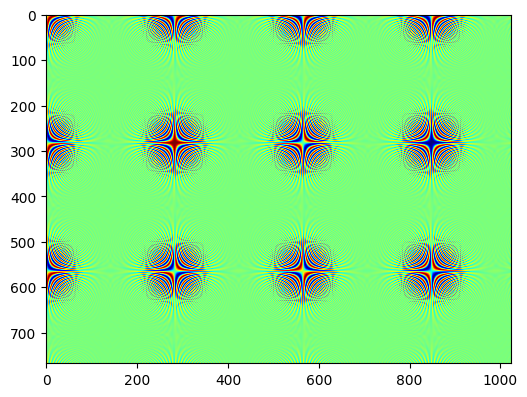

In [171]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(1, figsize=(6,7))
plt.imshow(data, cmap = "jet")


In [172]:
#Saving and loading numpy arrays using files
a = np.random.randn(2,3)
a

array([[ 1.22003935, -0.16294725, -0.49263105],
       [-1.17282268, -0.0983001 , -0.85635857]])

In [173]:
np.save("my_array",a) # the array is saved into a file with .npy format by default

In [175]:
a = np.load("my_array.npy") # to load numpy array

In [176]:
a

array([[ 1.22003935, -0.16294725, -0.49263105],
       [-1.17282268, -0.0983001 , -0.85635857]])

In [177]:
with open("my_array.npy", "rb") as f:
  a = f.read()
print(a) #read in binary mode - contains metadata as well - to extract the numpy array alone use np.load

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \n-t\x04\xfaG\x85\xf3?\xfe\x06B\x94t\xdb\xc4\xbf\xed\x1b'dD\x87\xdf\xbftoL\xb7\xe1\xc3\xf2\xbf\xb7\x8f\xdd\x0f2*\xb9\xbfV\xe4\x15\x16Jg\xeb\xbf"


In [180]:
a = np.load("my_array.npy")

In [181]:
# np array save and load as txt file
np.savetxt("my_array.csv",a)

In [182]:
#read numpy array from csv file
a = np.loadtxt("my_array.csv")
a

array([[ 1.22003935, -0.16294725, -0.49263105],
       [-1.17282268, -0.0983001 , -0.85635857]])

In [183]:
# read using open
with open("my_array.csv", "rt") as f:
  content = f.read()
print(content)

1.220039345388850949e+00 -1.629472469249363953e-01 -4.926310518316643905e-01
-1.172822681436596959e+00 -9.830010306683233112e-02 -8.563585692746851219e-01



when read using open with rt as read mode, the default delimiter is tab, to have a different delimitter, np.loadtxt can be used

In [187]:
b = np.loadtxt("my_array.csv")
b

array([[ 1.22003935, -0.16294725, -0.49263105],
       [-1.17282268, -0.0983001 , -0.85635857]])

In [188]:
np.savetxt("my_array2.csv", a, delimiter=",")

In [189]:
with open( "my_array2.csv", "rt") as f:
  content = f.read()
print(content)

1.220039345388850949e+00,-1.629472469249363953e-01,-4.926310518316643905e-01
-1.172822681436596959e+00,-9.830010306683233112e-02,-8.563585692746851219e-01



when saved using np.savetxt passing delimiter as "," open reads the array with , as separator

---



In [190]:
#saving and loading multiple arrays together - Zipped format
b = np.array([1,4,5,6,0])
np.savez("my_arrays", my_a = a, my_b = b)

the two arrays are stored as values in a dictionary with keys being my_a, my_b

In [191]:
my_arrays = np.load("my_arrays.npz")

In [192]:
type(my_arrays)

numpy.lib.npyio.NpzFile

In [193]:
list(my_arrays.keys())

['my_a', 'my_b']

In [194]:
my_arrays["my_a"]

array([[ 1.22003935, -0.16294725, -0.49263105],
       [-1.17282268, -0.0983001 , -0.85635857]])

In [195]:
my_arrays["my_b"]

array([1, 4, 5, 6, 0])